In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
# Association rule with 10% support and 70% confidence 
frequent_itemsets = apriori(book, min_support = 0.1, use_colnames=True)
frequent_itemsets

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [4]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [5]:
#An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [6]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


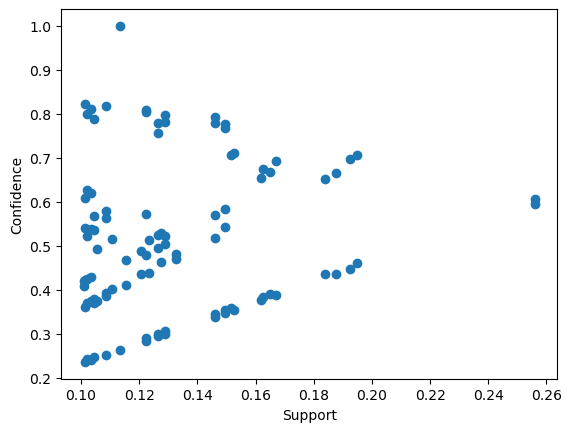

In [7]:
#Visualizing the results 
import matplotlib.pyplot as plt
plt.scatter(rules.support, rules.confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Association rule with 20% support and 60% confidence

In [8]:
#support = 20%
frequent_itemsets2 = apriori(book, min_support=0.20, use_colnames=True)
frequent_itemsets2

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [9]:
#with 60% confidence 
rules2 = association_rules(frequent_itemsets2, metric="lift",min_threshold=0.60)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


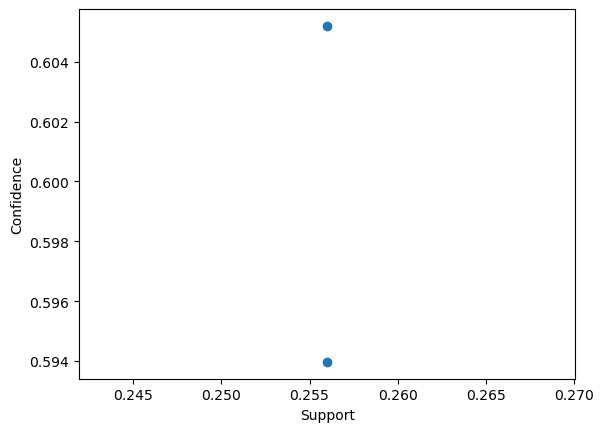

In [10]:
plt.scatter(rules2.support, rules2.confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Association rule with 5% support and 90% confidence

In [11]:
#5% support 
frequent_itemsets3 = apriori(book, min_support=0.05, use_colnames=True)
frequent_itemsets3

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(GeogBks, CookBks, DoItYBks, YouthBks)"
96,0.0560,"(GeogBks, CookBks, ArtBks, YouthBks)"
97,0.0650,"(GeogBks, CookBks, DoItYBks, ArtBks)"
98,0.0510,"(GeogBks, CookBks, ChildBks, DoItYBks, YouthBks)"


In [12]:
#confidence=90
rules3 = association_rules(frequent_itemsets3, metric='lift', min_threshold=0.90)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(GeogBks, CookBks, ChildBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
658,(GeogBks),"(ArtBks, ChildBks, DoItYBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(CookBks),"(GeogBks, ArtBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ChildBks),"(GeogBks, ArtBks, DoItYBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


In [13]:
rules3.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
181,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
184,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
513,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
508,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
510,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
15,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [14]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ArtBks),"(GeogBks, CookBks, ChildBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
658,(GeogBks),"(ArtBks, ChildBks, DoItYBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
659,(CookBks),"(GeogBks, ArtBks, ChildBks, DoItYBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(ChildBks),"(GeogBks, ArtBks, DoItYBks, CookBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


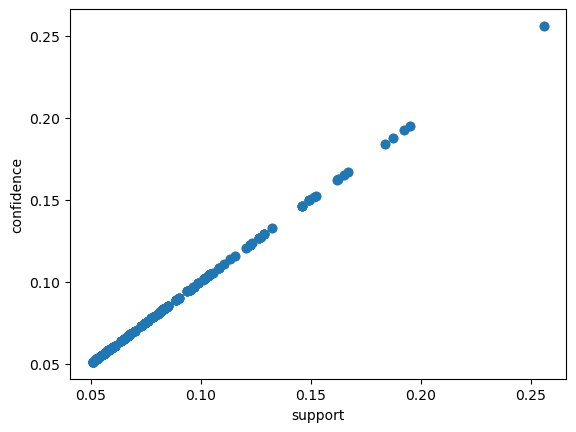

In [15]:
# visualization of obtained rule
plt.scatter(rules3.support,rules3.support)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()